In [90]:
#Libraries to Import:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


plt.rcParams['figure.figsize'] = [15, 6]

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
import statsmodels.stats.api as ssa
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler



from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


from mlxtend.feature_selection import SequentialFeatureSelector


import statsmodels.api as sma

#pd.options.display.max_rows = None

pd.options.display.max_columns = None

pd.options.display.float_format = '{:0.6f}'.format

In [3]:
df=pd.read_csv(r"C:\Users\K\Downloads\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.000000,4766729.247706,1870439.615657,1750000.000000,3430000.000000,4340000.000000,5740000.000000,13300000.000000
area,545.000000,5150.541284,2170.141023,1650.000000,3600.000000,4600.000000,6360.000000,16200.000000
bedrooms,545.000000,2.965138,0.738064,1.000000,2.000000,3.000000,3.000000,6.000000
bathrooms,545.000000,1.286239,0.502470,1.000000,1.000000,1.000000,2.000000,4.000000
stories,545.000000,1.805505,0.867492,1.000000,1.000000,2.000000,2.000000,4.000000
parking,545.000000,0.693578,0.861586,0.000000,0.000000,0.000000,1.000000,3.000000


In [28]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [29]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Performing EDA

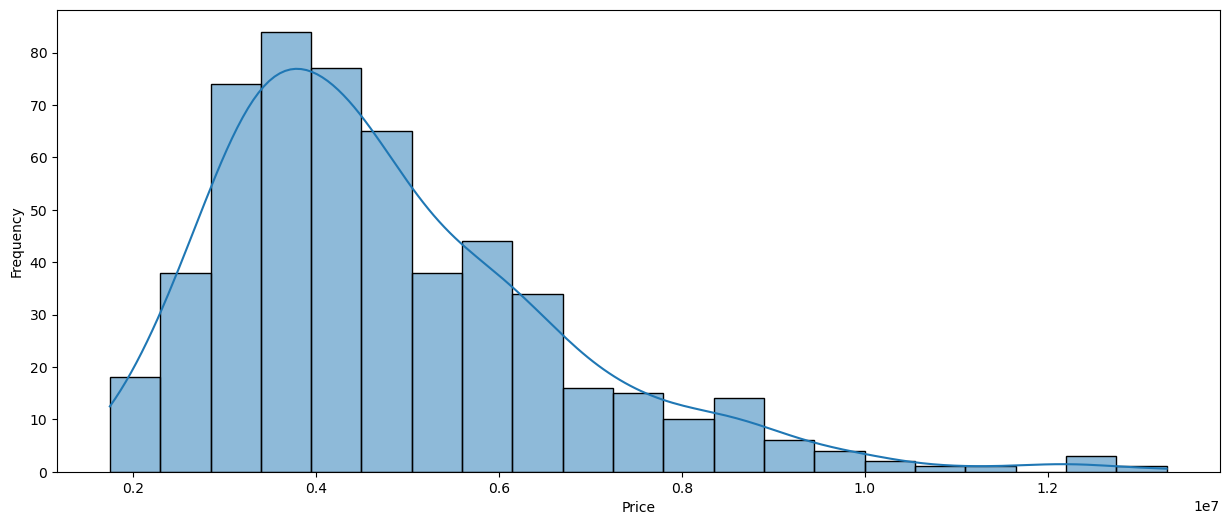

In [30]:
sns.histplot(df['price'],kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Most of the house price are in the price range between 20,00,000 to 70,00,000

Some of the outliers are above 1 crore which is at the right tail

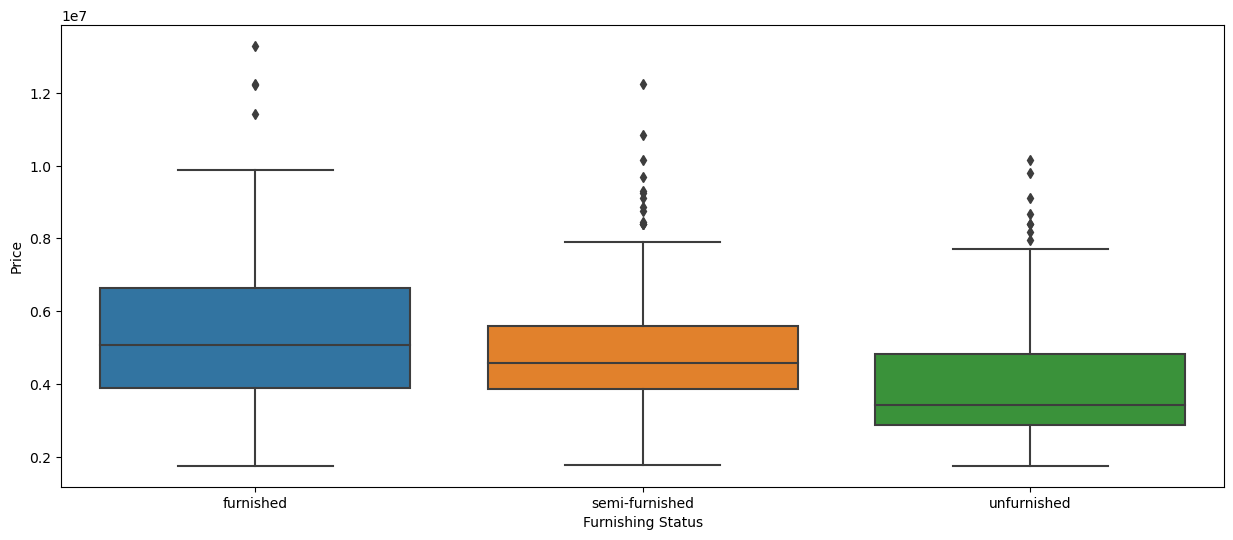

In [31]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

50% of the furnished house prices are between 40 lakhs and 65 lakhs.
50% of the semi-furnished house prices are between 40 lakhs and 50 lakhs.
50% of the unfurnished house prices are between 30 lakhs and 45 lakhs.

Most of the extreme outliers are seen in semi_furnished.

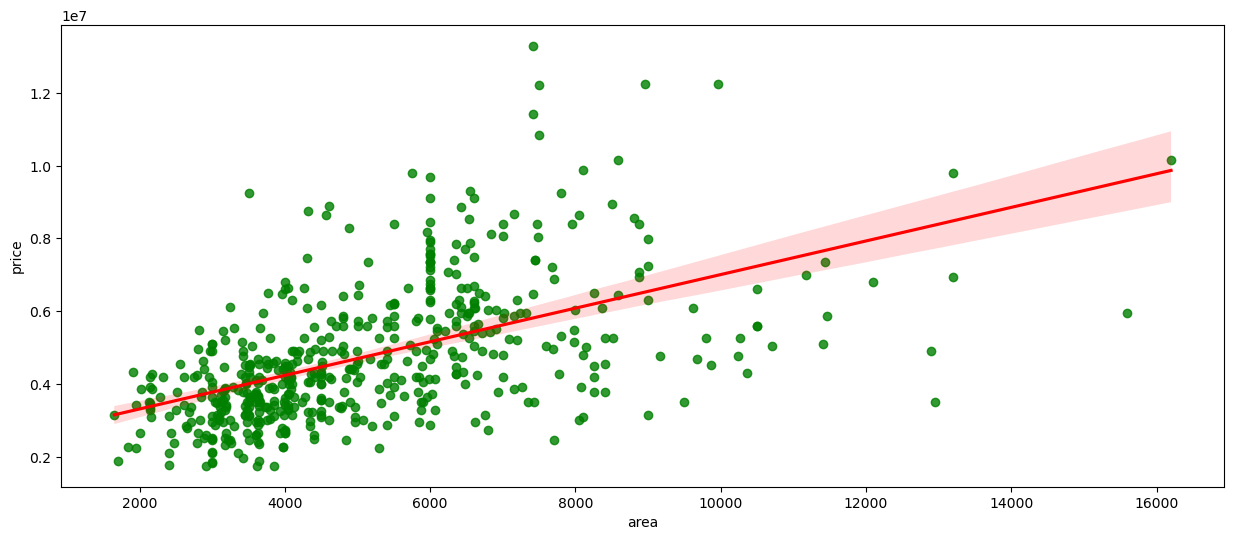

In [32]:
sns.regplot(data=df,x='area', y='price', scatter=True, color='green', line_kws={"color": "red"})
plt.show()

Here as the 
area increases the price also increases. So we assume there is a relation between area and price

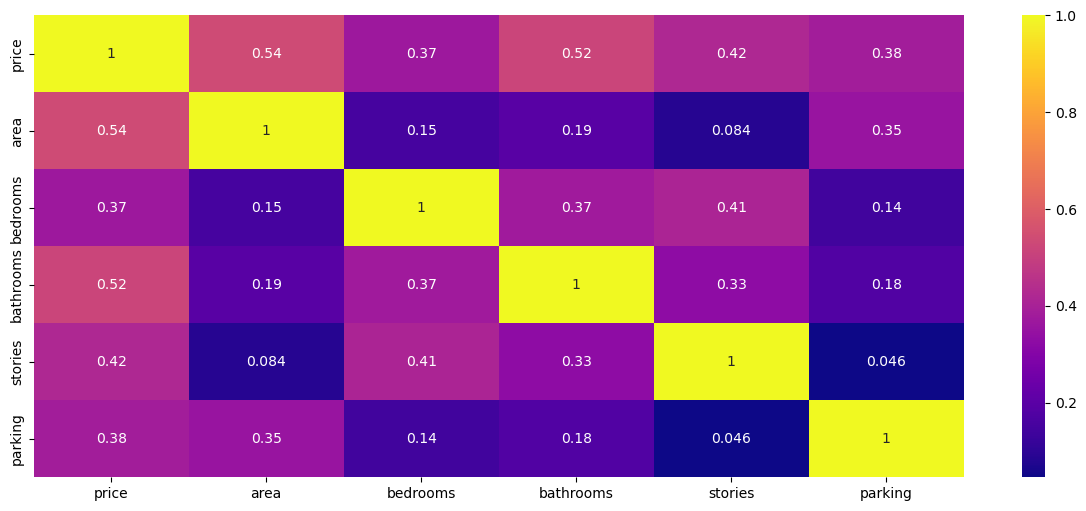

In [33]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

There is normal correlation among price, area and bathrooms.

Other have less correlation

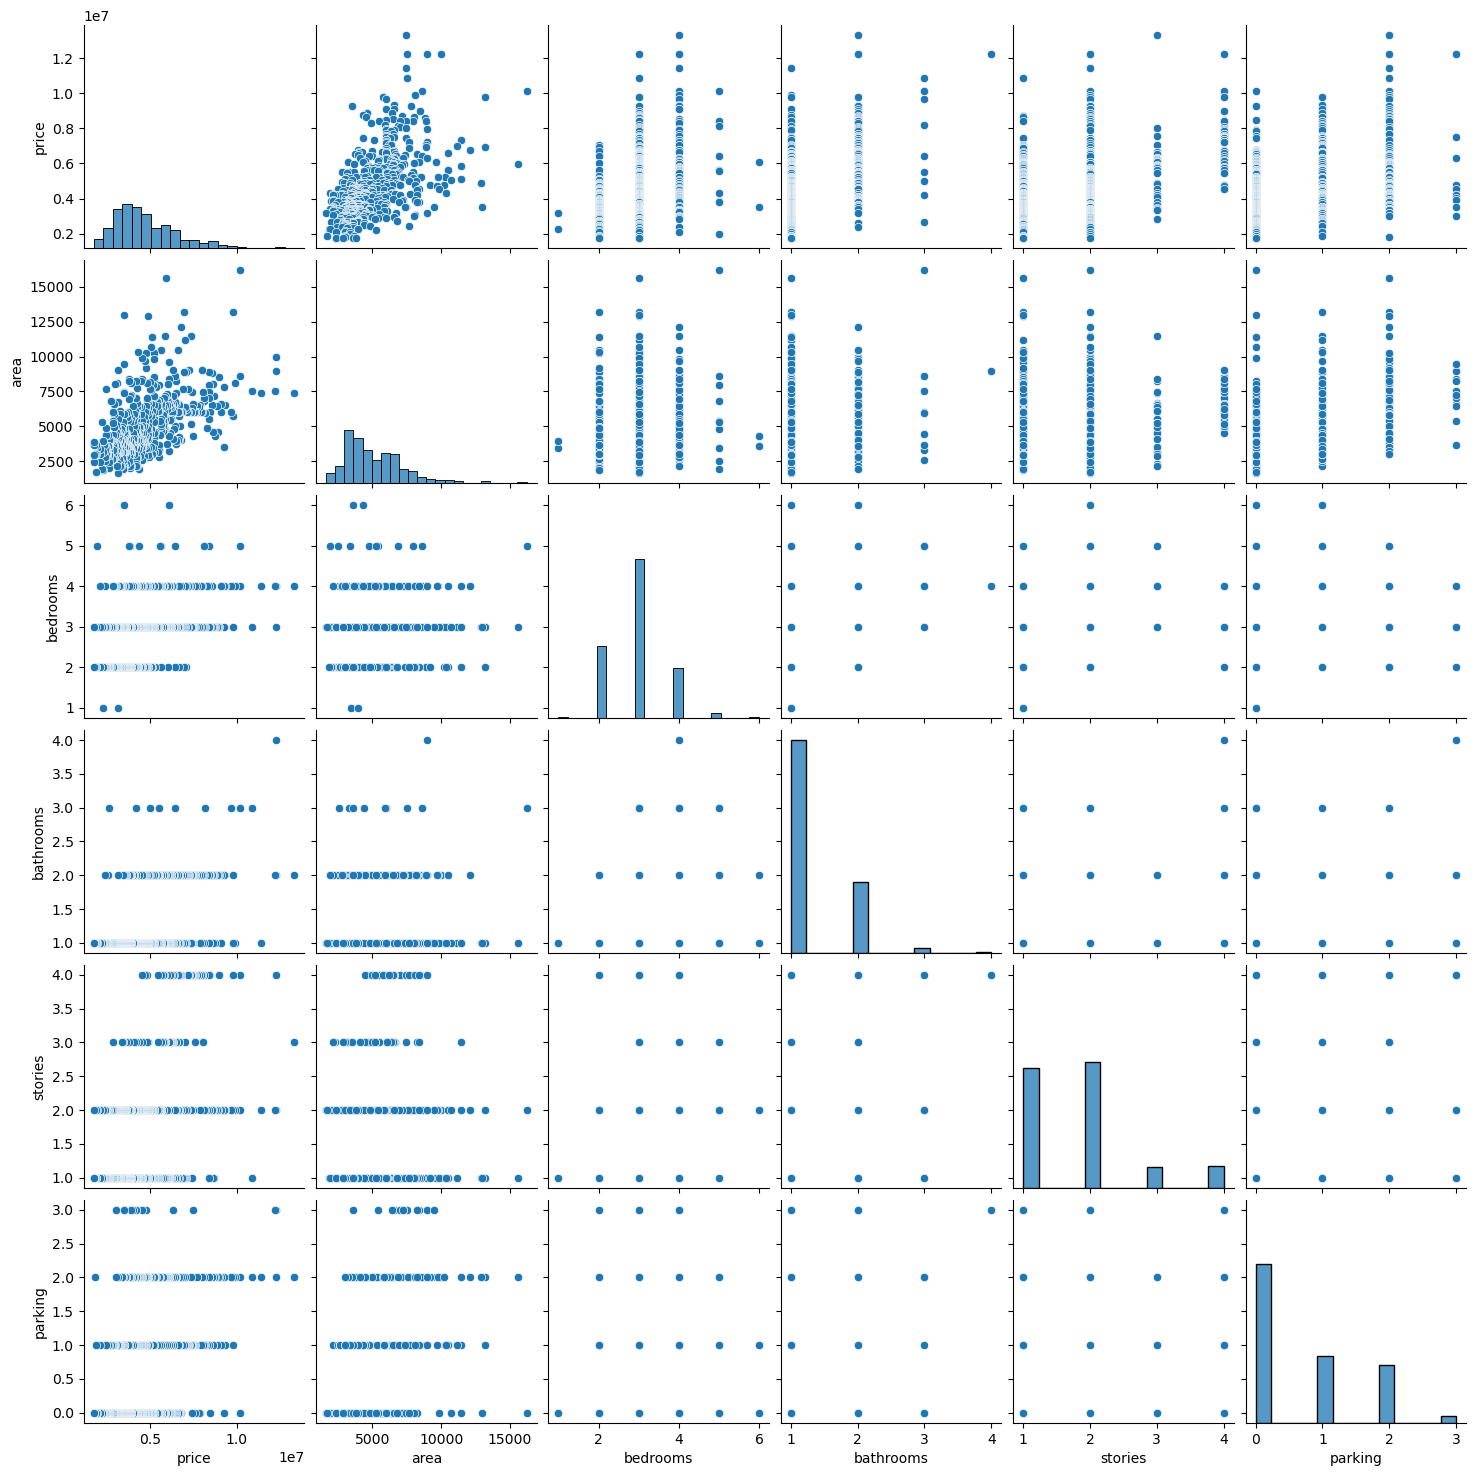

In [34]:
sns.pairplot(df)
plt.show()

# Data Cleaning and Preparation

In [6]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(include=np.number)

In [7]:
print(df_num.shape)
print(df_cat.shape)

(545, 6)
(545, 7)


In [8]:
dummy = pd.get_dummies(df_cat.drop(['furnishingstatus'], axis=1), drop_first=True)


In [9]:
dummy

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [10]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [11]:
oe = OrdinalEncoder()
dummy['furnishingstatus_encoded'] = oe.fit_transform(df_cat[['furnishingstatus']])


In [12]:
dummy

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_encoded
0,1,0,0,0,1,1,0.000000
1,1,0,0,0,1,0,0.000000
2,1,0,1,0,0,1,1.000000
3,1,0,1,0,1,1,0.000000
4,1,1,1,0,1,0,0.000000
...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,2.000000
541,0,0,0,0,0,0,1.000000
542,1,0,0,0,0,0,2.000000
543,0,0,0,0,0,0,0.000000


In [13]:
df_num

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [14]:
df_final=pd.concat([df_num,dummy],axis=1)

In [15]:
df_final

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_encoded
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0.000000
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0.000000
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1.000000
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0.000000
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,2.000000
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1.000000
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,2.000000
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0.000000



# Base Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [19]:

X = df_final.drop('price',axis=1)

y = df_final['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)


mm=MinMaxScaler()
X_train_scaled_mm=mm.fit_transform(X_train)
X_test_scaled_mm=mm.fit_transform(X_test)

lr = LinearRegression()

lr_bm=lr.fit(X_train_scaled_mm,y_train)

pred_test = lr_bm.predict(X_test_scaled_mm)

pred_train = lr_bm.predict(X_train_scaled_mm)

mse_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=pred_test))

r2Score_test = r2_score(y_true=y_test,y_pred=pred_test)

r2Score_train = r2_score(y_true=y_train,y_pred=pred_train)

accuracy = lr.score(X_train_scaled_mm,y_train)*100

print('r2_score_test : ',r2Score_test,'\n')

print('r2_score_train : ',r2Score_train,'\n')

print('Test RMSE : ',mse_test,'\n')

print('Accuarcy of the test result',accuracy )

r2_score_test :  0.7477660151813463 

r2_score_train :  0.8557468487804823 

Test RMSE :  764391.7580532818 

Accuarcy of the test result 85.57468487804823


# Building the multiple linear regression model using OLS Method

In [20]:


# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
temp_X = sma.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train,X_test,y_train,y_test = train_test_split(temp_X, y, random_state=1, test_size = 0.2)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_inter', X_train.shape)
print('y_train_inter', y_train.shape)

# print dimension of test set
print('X_test_inter', X_test.shape)
print('y_test_inter', y_test.shape)

X_train_inter (436, 14)
y_train_inter (436,)
X_test_inter (109, 14)
y_test_inter (109,)


In [21]:
MLR_model = sma.OLS(y_train, X_train).fit()

print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     167.5
Date:                Fri, 01 Sep 2023   Prob (F-statistic):          2.22e-157
Time:                        23:24:44   Log-Likelihood:                -6406.8
No. Observations:                 436   AIC:                         1.284e+04
Df Residuals:                     422   BIC:                         1.290e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The Durbin-Watson test is used to check the autocorrelation between the residuals.
between 2 and 4: negative autocorrelation

The Jarque-Bera test is used to check the normality of the residuals.
the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.


The 'Cond. No' (1.5e+05) represents the Condition Number (CN) which is used to check the multicollinearity
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mm=MinMaxScaler()
df_scaled_mm=mm.fit_transform(df_num)
df_scaled=pd.DataFrame(df_scaled_mm,columns=df_num.columns.to_list())

In [23]:
df_sf_BM1=pd.concat([dummy,df_scaled],axis=1) #scaled_final
df_sf_BM1.head()

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_encoded,price,area,bedrooms,bathrooms,stories,parking
0,1,0,0,0,1,1,0.000000,1.000000,0.396564,0.600000,0.333333,0.666667,0.666667
1,1,0,0,0,1,0,0.000000,0.909091,0.502405,0.600000,1.000000,1.000000,1.000000
2,1,0,1,0,0,1,1.000000,0.909091,0.571134,0.400000,0.333333,0.333333,0.666667
3,1,0,1,0,1,1,0.000000,0.906061,0.402062,0.600000,0.333333,0.333333,1.000000
4,1,1,1,0,1,0,0.000000,0.836364,0.396564,0.600000,0.000000,0.333333,0.666667


In [24]:
#df_sf_BM1.drop(columns='price',inplace=True)

In [25]:

X = df_sf_BM1.drop('price',axis=1)

y = df_sf_BM1['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

lr = LinearRegression()

lr_bm=lr.fit(X_train,y_train)

pred_test = lr_bm.predict(X_test)

pred_train = lr_bm.predict(X_train)

mse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=pred_test))

r2Score_test = r2_score(y_true=y_test,y_pred=pred_test)

r2Score_train = r2_score(y_true=y_train,y_pred=pred_train)

accuracy = lr.score(X_train,y_train)*100

print('r2_score_test : ',r2Score_test,'\n')

print('r2_score_train : ',r2Score_train,'\n')

print('RMSE : ',mse,'\n')

print('Accuarcy of the test result',accuracy )

r2_score_test :  0.6728084275060373 

r2_score_train :  0.6789071362424813 

RMSE :  0.09812843868947146 

Accuarcy of the test result 67.89071362424814


# OLS Transform

In [54]:
X = df_sf_BM1.drop('price',axis=1)

y = df_sf_BM1['price']

temp_X = sma.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(temp_X, y, random_state=1, test_size = 0.2)

In [55]:
model_sqrt = sma.OLS(np.sqrt(y_train), X_train).fit() #sqr root

model_cbrt = sma.OLS(np.cbrt(y_train), X_train).fit() #cube root transformation

model_log = sma.OLS(np.log(y_train), X_train).fit() #log trans

model_yojh = sma.OLS(stats.yeojohnson(y_train)[0], X_train).fit() #ytojohnson



In [56]:
transf_score = pd.DataFrame(columns=['Transformation',
                                     'R_Squared',
                                      'Adj Rsquared' ]
                                  )


def update_transformation (name,
                           model
                           ):

    # assign 'comp_perf' as global variable
    global transf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    transf_score = transf_score.append({'Transformation'    : name,
                                        'R_Squared'         : model.rsquared,
                                        'Adj Rsquared'    : model.rsquared_adj
                                    },
                                   ignore_index = True)

In [58]:
update_transformation(name = "Square Root", model = model_sqrt)
update_transformation(name = "Cube Root", model = model_cbrt)
update_transformation(name = "Yeo Johnson", model = model_yojh)

In [59]:
transf_score

,Transformation,R_Squared,Adj Rsquared
0,Square Root,0.691643,0.682895
1,Cube Root,0.648525,0.638554
2,Yeo Johnson,0.704035,0.695638
3,Square Root,0.691643,0.682895
4,Cube Root,0.648525,0.638554
5,Yeo Johnson,0.704035,0.695638


In [26]:
def get_split():
    
    X = df_final.drop('price',axis=1)

    y = df_final['price']

    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)
    
    #reseting index
    X_train.index=np.arange(0,381)
    y_train.index=np.arange(0,381)
    X_test.index=np.arange(0,164)
    y_test.index=np.arange(0,164)
    #df.index

    mm=MinMaxScaler()
    X_trainm=mm.fit_transform(X_train)
    X_testm=mm.transform(X_test)
    
    return X_trainm,X_testm,y_train,y_test
    

In [27]:
def get_train_rmse(model):
    
    train_pred = model.predict(X_trainm)

    mse_train = mean_squared_error(y_train, train_pred)

    rmse_train = round(np.sqrt(mse_train), 4)
    
    return(rmse_train)

In [28]:

def get_test_rmse(model):

    
    test_pred = model.predict(X_testm)

    mse_test = mean_squared_error(y_test, test_pred)

    rmse_test = round(np.sqrt(mse_test), 4)

    return(rmse_test)

In [29]:
def mape(actual, predicted):
    
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    test_pred = model.predict(X_testm)
    
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

In [30]:
def get_score(model):
    
    r_sq = model.score(X_trainm, y_train)
     
    n = X_trainm.shape[0]
    
    k = X_trainm.shape[1]
    
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    return ([r_sq, r_sq_adj])

In [97]:
# X = df_final.drop('price',axis=1)

# y = df_final['price']

# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

# #reseting index
# X_train.index=np.arange(0,381)
# y_train.index=np.arange(0,381)
# X_test.index=np.arange(0,164)
# y_test.index=np.arange(0,164)

In [98]:
# print(X_train.shape)
# print(X_test.shape)

# print(X_trainm.shape)
# print(X_testm.shape)
# print(y_train.shape)

In [99]:
#pd.DataFrame(X_train)

In [100]:
#pd.DataFrame(X_trainm)

In [31]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    global score_card

    global X_trainm
    global X_testm
    global y_train
    global y_test
    
    #X_trainm,X_testm,y_train,y_test = get_split()
    splits = get_split()
    
    X_trainm = splits[0]
    X_testm = splits[1]
    y_train = splits[2]
    y_test = splits[3]
  

    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model),
                        'Train_RMSE':get_train_rmse(model),
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [32]:
def simple():

    global X_trainm
    global X_testm
    global y_train
    global y_test

    #X_trainm,X_testm,y_train,y_test = get_split()
    splits = get_split()

    X_trainm=splits[0]
    X_testm=splits[1]
    y_train=splits[2]
    y_test=splits[3]

    print(X_train.shape)
    print(X_test.shape)

    print(X_trainm.shape)
    print(X_testm.shape)
    print(y_train.shape)
    print(y_test.shape)

In [35]:
print(X_trainm.shape)
print(X_testm.shape)
print(y_train.shape)
print(y_test.shape)

(381, 13)
(164, 13)
(381,)
(164,)


In [34]:
simple()

(381, 12)
(164, 12)
(381, 13)
(164, 13)
(381,)
(164,)


In [36]:
linreg = LinearRegression()

MLR_model = linreg.fit(X_trainm, y_train)

MLR_model.score(X_trainm, y_train)

0.8557468487804823

In [37]:
print('RMSE on train set: ', get_train_rmse(MLR_model))

print('RMSE on test set: ', get_test_rmse(MLR_model))

difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  540310.423
RMSE on test set:  684780.6236
Difference between RMSE on train and test set:  144470.2006000001


In [38]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE
0,Linear Regression,-,-,0.855747,0.850637,684780.623600,11.031151,540310.423000


In [39]:
ridge = Ridge(alpha = 1, max_iter = 500)

ridge.fit(X_trainm, y_train)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 689465.5547


In [40]:
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE
0,Linear Regression,-,-,0.855747,0.850637,684780.623600,11.031151,540310.423000
1,Ridge Regression (with alpha = 1),1,-,0.839031,0.833329,689465.554700,11.815345,570757.368200


In [41]:
ridge = Ridge(alpha = 5, max_iter = 500)

ridge.fit(X_trainm, y_train)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 787574.1578


In [42]:
ridge.coef_

array([2157546.48959578,  304670.7743511 , 1242420.48982495,
        880861.26735899,  452035.55745417,  541412.16990138,
        355820.26626884,  163915.25529066,  574980.4153284 ,
        586394.38415656,  432916.7599268 , -287017.84113197,
       1784332.72394847])

In [43]:
df_ridge_coeff = pd.DataFrame({'Variable': ['mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_encoded',
       'area', 'bedrooms', 'bathrooms', 'stories', 'parking','Price/area'], 'Coefficient': ridge.coef_})

print('Insignificant variables obtained from ridge Regression when alpha is 0.01')
df_ridge_coeff.Variable[df_ridge_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from ridge Regression when alpha is 0.01


[]

In [113]:
df_ridge_coeff

,Variable,Coefficient
0,mainroad_yes,2157546.489596
1,guestroom_yes,304670.774351
2,basement_yes,1242420.489825
3,hotwaterheating_yes,880861.267359
4,airconditioning_yes,452035.557454
5,prefarea_yes,541412.169901
6,furnishingstatus_encoded,355820.266269
7,area,163915.255291
8,bedrooms,574980.415328
9,bathrooms,586394.384157


In [44]:
lasso = Lasso(alpha = 20, max_iter = 500)

lasso.fit(X_trainm, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 684724.9926


In [115]:
lasso.coef_

array([5496973.20307147,   49810.04747608,  882781.22751283,
        587200.6087569 ,   96024.47374685,  316844.47418228,
        306540.22071681,   16280.07022712,  269466.44090821,
        325135.30674013,   94457.43319727,  -32384.38968985,
       5897911.06759967])

In [ ]:
df_sf_BM1.columns

In [116]:
df_lasso_coeff = pd.DataFrame({'Variable': ['mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_encoded',
       'area', 'bedrooms', 'bathrooms', 'stories', 'parking','Price/area'], 'Coefficient': lasso.coef_})

print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


[]

In [117]:
df_lasso_coeff

,Variable,Coefficient
0,mainroad_yes,5496973.203071
1,guestroom_yes,49810.047476
2,basement_yes,882781.227513
3,hotwaterheating_yes,587200.608757
4,airconditioning_yes,96024.473747
5,prefarea_yes,316844.474182
6,furnishingstatus_encoded,306540.220717
7,area,16280.070227
8,bedrooms,269466.440908
9,bathrooms,325135.306740


In [45]:
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE
0,Linear Regression,-,-,0.855747,0.850637,684780.623600,11.031151,540310.423000
1,Ridge Regression (with alpha = 1),1,-,0.839031,0.833329,689465.554700,11.815345,570757.368200
2,Lasso Regression,0.01,-,0.855747,0.850637,684724.992600,11.031801,540310.494100


In [46]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

enet.fit(X_trainm, y_train)

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 961979.8539


In [47]:
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE
0,Linear Regression,-,-,0.855747,0.850637,684780.623600,11.031151,540310.423000
1,Ridge Regression (with alpha = 1),1,-,0.839031,0.833329,689465.554700,11.815345,570757.368200
2,Lasso Regression,0.01,-,0.855747,0.850637,684724.992600,11.031801,540310.494100
3,Elastic Net Regression,0.1,0.01,0.623203,0.609856,961979.853900,17.976837,873241.229400


In [48]:

tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]

ridge = Ridge()

ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

ridge_grid.fit(X_trainm, y_train)

print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 680703.3844


In [49]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE
0,Linear Regression,-,-,0.855747,0.850637,684780.623600,11.031151,540310.423000
1,Ridge Regression (with alpha = 1),1,-,0.839031,0.833329,689465.554700,11.815345,570757.368200
2,Lasso Regression,0.01,-,0.855747,0.850637,684724.992600,11.031801,540310.494100
3,Elastic Net Regression,0.1,0.01,0.623203,0.609856,961979.853900,17.976837,873241.229400
4,Ridge Regression (using GridSearchCV),0.100000,-,0.855417,0.850296,680703.384400,11.110166,540927.779300


In [50]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     

lasso = Lasso()

lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

lasso_grid.fit(X_trainm, y_train)


print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 20} 

RMSE on test set: 684724.9926


In [51]:
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE
0,Linear Regression,-,-,0.855747,0.850637,684780.623600,11.031151,540310.423000
1,Ridge Regression (with alpha = 1),1,-,0.839031,0.833329,689465.554700,11.815345,570757.368200
2,Lasso Regression,0.01,-,0.855747,0.850637,684724.992600,11.031801,540310.494100
3,Elastic Net Regression,0.1,0.01,0.623203,0.609856,961979.853900,17.976837,873241.229400
4,Ridge Regression (using GridSearchCV),0.100000,-,0.855417,0.850296,680703.384400,11.110166,540927.779300
5,Lasso Regression (using GridSearchCV),20,-,0.855747,0.850637,684724.992600,11.031801,540310.494100


In [52]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]
  
enet = ElasticNet()


enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_trainm, y_train)


print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.0001} 

RMSE on test set: 682998.4867


In [53]:
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))


score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE
0,Linear Regression,-,-,0.855747,0.850637,684780.623600,11.031151,540310.423000
1,Ridge Regression (with alpha = 1),1,-,0.839031,0.833329,689465.554700,11.815345,570757.368200
2,Lasso Regression,0.01,-,0.855747,0.850637,684724.992600,11.031801,540310.494100
3,Elastic Net Regression,0.1,0.01,0.623203,0.609856,961979.853900,17.976837,873241.229400
4,Ridge Regression (using GridSearchCV),0.100000,-,0.855417,0.850296,680703.384400,11.110166,540927.779300
5,Lasso Regression (using GridSearchCV),20,-,0.855747,0.850637,684724.992600,11.031801,540310.494100
6,Elastic Net Regression (using GridSearchCV),0.000100,0.000100,0.855696,0.850585,682998.486700,11.062163,540405.302700


In [54]:
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

In [55]:
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE
0,Ridge Regression (using GridSearchCV),0.100000,-,0.855417,0.850296,680703.384400,11.110166,540927.779300
1,Elastic Net Regression (using GridSearchCV),0.000100,0.000100,0.855696,0.850585,682998.486700,11.062163,540405.302700
2,Lasso Regression,0.01,-,0.855747,0.850637,684724.992600,11.031801,540310.494100
3,Lasso Regression (using GridSearchCV),20,-,0.855747,0.850637,684724.992600,11.031801,540310.494100
4,Linear Regression,-,-,0.855747,0.850637,684780.623600,11.031151,540310.423000
5,Ridge Regression (with alpha = 1),1,-,0.839031,0.833329,689465.554700,11.815345,570757.368200
6,Elastic Net Regression,0.1,0.01,0.623203,0.609856,961979.853900,17.976837,873241.229400


# After Capping outlier from price column

# After feature engineering, creating new variable as price/area

In [406]:
pd.options.display.max_rows = None

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (554594351.py, line 1)

# Feature Engineering

In [16]:
df_final['Price/area']=df_final['price']/df_final['area'] #price/Area Square feet

In [17]:
df_final.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_encoded,Price/area
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0.000000,1792.452830
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0.000000,1367.187500
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1.000000,1229.919679
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0.000000,1628.666667
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0.000000,1537.735849


In [459]:
#After this Command Once again run the modal fit and predict from linear to GridSearch to find the difference before and after of R-Square

<Axes: ylabel='price'>

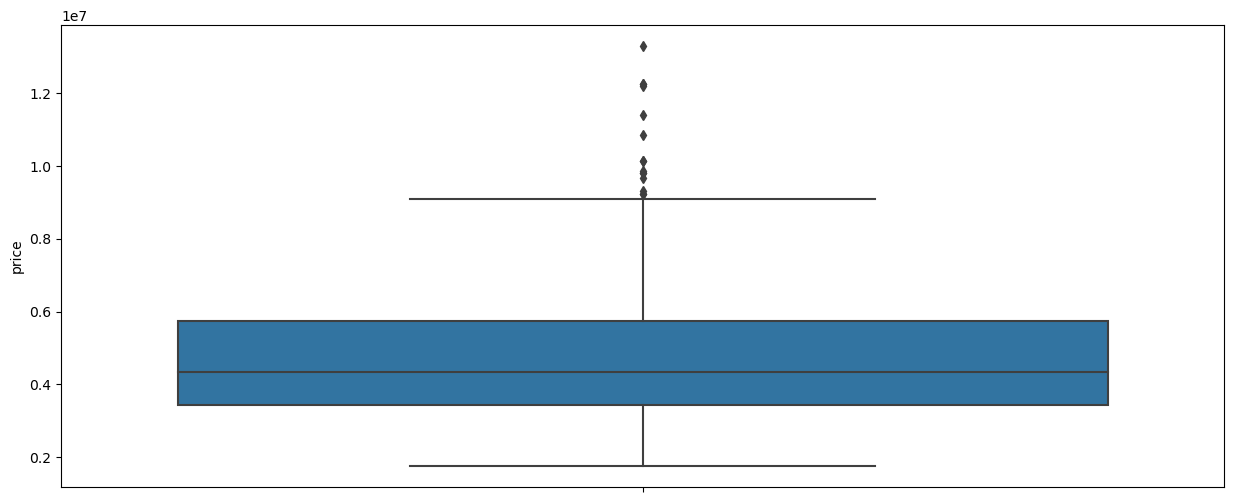

In [455]:
sns.boxplot(y=df_final['price'])

In [18]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(df_final['price'], 10)
ninetieth_percentile = np.percentile(df_final['price'], 90)
# print(tenth_percentile, ninetieth_percentile)
b =np.where(df_final['price']<tenth_percentile, tenth_percentile, df_final['price'])
df_final['price'] = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print(“Sample:”, sample)
print('New array:',df_final['price'])

New array: 0     7350000.000000
1     7350000.000000
2     7350000.000000
3     7350000.000000
4     7350000.000000
           ...      
540   2835000.000000
541   2835000.000000
542   2835000.000000
543   2835000.000000
544   2835000.000000
Name: price, Length: 545, dtype: float64


<Axes: ylabel='price'>

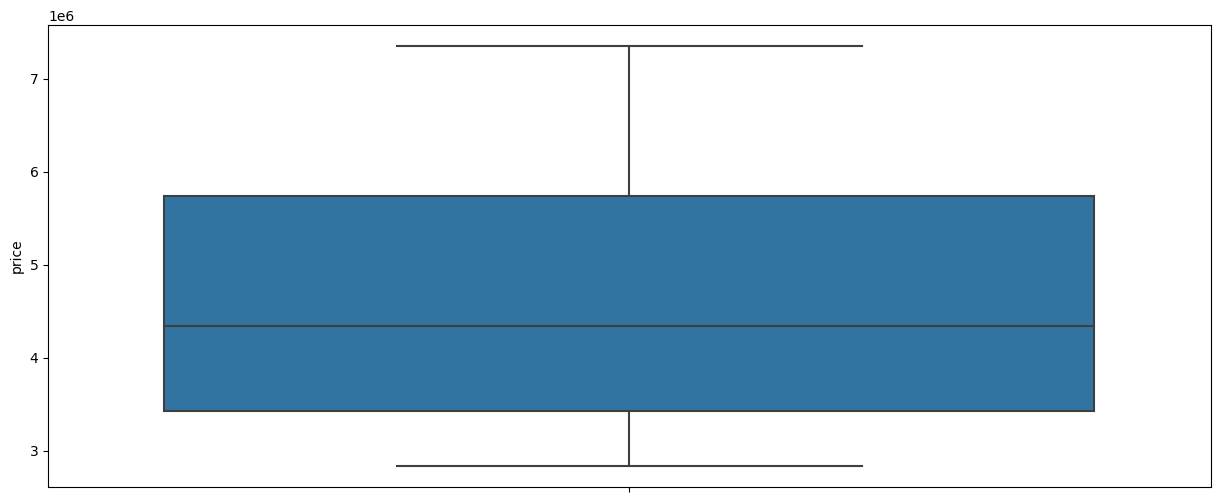

In [91]:
sns.boxplot(y=df_final['price'])

In [ ]:
#After capping ,Re-run the process from Linear to GridSearchCV

In [56]:
#functino to get r sq , adj-R sq, train RMSE, test RMSE
def Metrics(model):

    if model == model_lr :

        pred_test = model.predict(X_testm)

        rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

    elif model == sfs_forward:
        
        rmse_test=abs(sfs_forward.k_score_)

    elif model == sfs_backward:

        rmse_test=abs(sfs_backward.k_score_)

    elif model== rfe:

        rmse_test =np.sqrt(mean_squared_error(y_test,
                                     pred))
    else:

        rmse_test = np.mean(model)

    return (round(rmse_test,6))

In [57]:
#create and empty dataframe to store score for variour algorithm 

perf_score = pd.DataFrame(columns = ['Model', 'RMSE'])

In [58]:
def update_performance (name,model):

    global perf_score

    perf_score = perf_score.append({'Model'          : name,
                                    'RMSE'           : Metrics(model)
                                    },
                                   ignore_index = True)

In [59]:
lr = LinearRegression()

#build the model and find the r2score with RMSE

model_lr = lr.fit(X_trainm, y_train)

pred_train = model_lr.predict(X_trainm)

pred_test = model_lr.predict(X_testm)

In [60]:
update_performance('Linear Regression', model_lr)
perf_score

,Model,RMSE
0,Linear Regression,684780.623614


In [61]:
#SFS with 5 features

In [62]:
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator = lr,
                                       k_features=5,
                                       forward=True,
#                                        verbose=2,
                                       scoring = "neg_root_mean_squared_error")

In [63]:
sfs_forward.fit(X_trainm, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(5, 5),
                          scoring='neg_root_mean_squared_error')

In [64]:
sfs_forward.k_feature_names_

('0', '2', '3', '5', '12')

In [65]:
update_performance(name='SFS with 5 Features',model=sfs_forward)
perf_score

,Model,RMSE
0,Linear Regression,684780.623614
1,SFS with 5 Features,582123.309940


In [66]:
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator = lr,
                                       k_features=(4,7),
                                       forward=True,
#                                        verbose=2,
                                       scoring = "neg_root_mean_squared_error")

In [67]:
sfs_forward.fit(X_trainm, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(4, 7),
                          scoring='neg_root_mean_squared_error')

In [68]:
sfs_forward.k_feature_names_

('0', '2', '3', '5', '6', '9', '12')

In [69]:
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator = lr,
                                       k_features='best',
                                       forward=True,
#                                        verbose=2,
                                       scoring = "neg_root_mean_squared_error")

sfs_forward.fit(X_trainm, y_train)

update_performance(name='SFS with Best',model=sfs_forward)
perf_score

,Model,RMSE
0,Linear Regression,684780.623614
1,SFS with 5 Features,582123.309940
2,SFS with Best,563702.188771


In [70]:
lr = LinearRegression()
sfs_backward = SequentialFeatureSelector(estimator = lr,
                                       k_features='best',
                                       forward=False,
#                                        verbose=2,
                                       scoring = "neg_root_mean_squared_error")

sfs_backward.fit(X_trainm, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13),
                          scoring='neg_root_mean_squared_error')

In [71]:
sfs_backward.k_feature_names_

('0', '2', '3', '4', '5', '6', '8', '9', '12')

In [72]:
update_performance(name='Backward SFS with Best',model=sfs_forward)
perf_score

,Model,RMSE
0,Linear Regression,684780.623614
1,SFS with 5 Features,582123.309940
2,SFS with Best,563702.188771
3,Backward SFS with Best,563702.188771


In [73]:
X = df_final.drop('price',axis=1)

y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)
    
#reseting index
X_train.index=np.arange(0,381)
y_train.index=np.arange(0,381)
X_test.index=np.arange(0,164)
y_test.index=np.arange(0,164)

In [74]:
rfe = RFE(estimator=lr,
         n_features_to_select=5)
rfe.fit(X_trainm, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [188]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_encoded,Price/area
0,3600,3,1,1,1,1,0,0,0,0,0,2.000000,1030.555556
1,6420,3,2,2,1,1,0,0,0,1,1,1.000000,1379.283489
2,3150,3,2,1,0,1,1,1,0,1,0,0.000000,1733.333333
3,7000,3,2,4,2,1,0,0,0,1,0,0.000000,1154.420000
4,7950,5,2,2,2,1,0,1,1,0,0,2.000000,1056.603774
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3180,2,1,1,0,1,0,0,0,0,0,2.000000,726.415094
377,5150,3,2,4,2,1,0,0,0,1,0,1.000000,1427.184466
378,3420,2,1,2,1,1,0,0,1,0,0,1.000000,1105.263158
379,6000,3,2,3,0,1,1,0,0,1,0,0.000000,1108.333333


In [189]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_encoded',
       'Price/area'],
      dtype='object')

In [75]:
pd.DataFrame(rfe.ranking_,index=X_train.columns)

,0
area,1
bedrooms,7
bathrooms,1
stories,1
parking,5
mainroad_yes,2
guestroom_yes,1
basement_yes,9
hotwaterheating_yes,4
airconditioning_yes,3


In [76]:
feature_index = pd.Series(rfe.ranking_,index=X_train.columns).sort_values(ascending=False)

In [77]:
feature_index

basement_yes                9
furnishingstatus_encoded    8
bedrooms                    7
prefarea_yes                6
parking                     5
hotwaterheating_yes         4
airconditioning_yes         3
mainroad_yes                2
area                        1
bathrooms                   1
stories                     1
guestroom_yes               1
Price/area                  1
dtype: int32

In [78]:
impfeature_rfe = feature_index[feature_index==1].index

In [79]:
impfeature_rfe

Index(['area', 'bathrooms', 'stories', 'guestroom_yes', 'Price/area'], dtype='object')

In [80]:
rfe_train = X_train.loc[:,impfeature_rfe]
rfe_test = X_test.loc[:,impfeature_rfe]

In [178]:
rfe_train

,const,guestroom_yes,basement_yes,prefarea_yes,parking
272,1.000000,1,1,0,0.666667
40,1.000000,0,1,1,0.000000
326,1.000000,0,1,0,0.000000
441,1.000000,0,0,0,0.000000
511,1.000000,0,0,0,0.000000
...,...,...,...,...,...
129,1.000000,0,0,1,0.666667
144,1.000000,1,1,0,0.333333
72,1.000000,0,0,1,0.000000
235,1.000000,1,0,0,0.333333


In [179]:
y_train

0     3710000.000000
1     7350000.000000
2     5460000.000000
3     7350000.000000
4     7350000.000000
           ...      
376   2835000.000000
377   7350000.000000
378   3780000.000000
379   6650000.000000
380   2835000.000000
Name: price, Length: 381, dtype: float64

In [173]:
rfe_train.shape

(436, 5)

In [175]:
y_train.shape

(381,)

In [176]:
y_test.shape

(164,)

In [177]:
X_train.shape

(436, 13)

In [81]:
lr = LinearRegression()

lr.fit(rfe_train, y_train)

pred = lr.predict(rfe_test)

rfe_rmse = np.sqrt(mean_squared_error(y_test,pred))

rfe_rmse

762972.0548575422

In [82]:
update_performance(name='RFE',model=rfe)
perf_score

,Model,RMSE
0,Linear Regression,684780.623614
1,SFS with 5 Features,582123.309940
2,SFS with Best,563702.188771
3,Backward SFS with Best,563702.188771
4,RFE,762972.054858


In [ ]:
# x = df_final.drop('price', axis = 1)
# # condider the dependent cariables
# y = df_final['price']

In [ ]:
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=1)

In [83]:
kf = KFold(n_splits=5,shuffle=True, random_state=1)

In [84]:
lr = LinearRegression()
prediction_ml = []
rmse_kf = []

for train_index, test_index in kf.split(X_trainm):
    kf_xtrain = X_train.iloc[train_index]
    kf_xtest = X_train.iloc[test_index]
    kf_ytrain = y_train.iloc[train_index]
    kf_ytest = y_train.iloc[test_index]
    
    prediction_ml.append(lr.fit(kf_xtrain, kf_ytrain).predict(kf_xtest))
    
    
    kfold=lr.fit(kf_xtrain,kf_ytrain)
    pred = kfold.predict(kf_xtest)
    rmse_kf.append(np.sqrt(mean_squared_error(kf_ytest,pred)))

In [85]:
rmse_kf

[507389.8375662507,
 531653.3036490675,
 566981.1721062654,
 558383.322653787,
 674491.7091828653]

In [86]:
update_performance(name = 'K Fold', model = rmse_kf)
perf_score

,Model,RMSE
0,Linear Regression,684780.623614
1,SFS with 5 Features,582123.309940
2,SFS with Best,563702.188771
3,Backward SFS with Best,563702.188771
4,RFE,762972.054858
5,K Fold,567779.869032


In [87]:

lr = LinearRegression()

loocv = LeaveOneOut()

loocv_rmse = []
loocv_score = []


for train_index, test_index in loocv.split(X_trainm):
    loocv_xtrain = X_train.iloc[train_index]
    loocv_xtest = X_train.iloc[test_index]
    loocv_ytrain = y_train.iloc[train_index]
    loocv_ytest = y_train.iloc[test_index]
    
    loocv_score.append(lr.fit(loocv_xtrain, loocv_ytrain).predict(loocv_xtest))
    
    
    loocv=lr.fit(loocv_xtrain,loocv_ytrain)
    pred = loocv.predict(loocv_xtest)
    loocv_rmse.append(np.sqrt(mean_squared_error(loocv_ytest,pred)))

In [88]:
update_performance(name = 'LOOCV', model = loocv_rmse)
perf_score

,Model,RMSE
0,Linear Regression,684780.623614
1,SFS with 5 Features,582123.309940
2,SFS with Best,563702.188771
3,Backward SFS with Best,563702.188771
4,RFE,762972.054858
5,K Fold,567779.869032
6,LOOCV,420022.010739


In [206]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [91]:
model = RandomForestRegressor(n_estimators=500, random_state=100)

# Fit the model
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)
print(model.score(X_train, y_train))

Mean Absolute Error: 186672.08597560978
0.995174903215038


In [92]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
model = GradientBoostingRegressor(random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the validation set and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)
print(model.score(X_train, y_train))

# Make predictions on the test data
#test_predictions = model.predict(test_data)

Mean Absolute Error: 230601.85682960006
0.9935651505761431
